# Problem Solving 02
_Beka Modebadze 2019_ - https://github.com/bexxmodd/econ-papers-reproduction
_____
## Replication of a paper published by Sam Jones and Finn Tarp - "Does foreign aid harm political institutions?"

> #### Original paper, published by **_Journal of Development Economics_** in 2015. You can download it from [here](https://drive.google.com/file/d/1DNtgPtwKZ9GtY65xc82PVGdpBl-86BlO/view?usp=sharing)

_______________________

In this session, we work on a paper that analyzes the labor supply in Malawi in an experimental setting.

_Abstract: The notion that foreign aid harms the institutions of recipient governments remains prevalent. We combine new
disaggregated aid data and various metrics of political institutions to re-examine this relationship. Long run
cross-section and alternative dynamic panel estimators show a small positive net effect of total aid on political
institutions. Distinguishing between types of aid according to their frequency domain and stated objectives,
we find that this aggregate net effect is driven primarily by the positive contribution of more stable inflows of
‘governance aid’. Weconclude that the data do not support the view that aid has had a systematic negative effect
on political institutions_

In [1]:
%%capture
! pip install seaborn
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

from matplotlib.ticker import StrMethodFormatter

lets import the data and observe first and last five rows

In [2]:
path = "PS04-5-Jones2016.dta"
df = pd.read_stata(path)
df.head(5)

,year,recipientCode,recipient,recipientRegion,weight,pop_weight,calpha,polity,xconst,ptss,...,missing,rc_ht_region,rc_ht_colonial,recipientIncL,recipientIncLM,recipientIncUM,recipientIncH,bilateral,devFund,devBank
0,1983-01-01,2,AGO,Sub-Saharan Africa,1,8.491680,-128.401306,-146.757950,-51.031757,-200.921722,...,0,4,7,0,0,0,0,0.854167,0,0
1,1983-01-01,3,ALB,Europe & Central Asia,1,2.831682,-146.175674,-163.987503,-148.354706,-13.572638,...,0,1,0,0,0,0,0,0.947368,0,0
2,1983-01-01,4,ARG,Latin America & Caribbean,1,29.447966,43.978588,97.327393,143.614151,-13.572638,...,0,2,2,0,0,0,0,0.854167,0,0
3,1983-01-01,6,BDI,Sub-Saharan Africa,1,4.542465,-107.733826,-118.042023,-148.354706,80.101906,...,0,4,8,0,0,0,0,0.875000,0,0
4,1983-01-01,7,BEN,Sub-Saharan Africa,1,3.917942,-111.687050,-132.399979,-148.354706,80.101906,...,0,4,6,0,0,0,0,0.912500,0,0


In [3]:
df.tail(5)

,year,recipientCode,recipient,recipientRegion,weight,pop_weight,calpha,polity,xconst,ptss,...,missing,rc_ht_region,rc_ht_colonial,recipientIncL,recipientIncLM,recipientIncUM,recipientIncH,bilateral,devFund,devBank
2838,2010-01-01,111,VNM,East Asia & Pacific,1,86.927773,-106.729301,-118.042023,-51.031757,-13.572638,...,0,7,6,0,1,0,0,0.916667,0,0
2839,2010-01-01,112,VUT,East Asia & Pacific,1,0.239651,213.432800,122.915260,NaN,80.101906,...,1,9,9,0,1,0,0,0.984375,0,0
2840,2010-01-01,113,YEM,Middle East & North Africa,1,24.052523,-114.155952,-60.610176,-99.693237,-107.247177,...,0,3,5,0,1,0,0,0.923913,0,0
2841,2010-01-01,114,ZAF,Sub-Saharan Africa,1,49.991310,70.207100,134.658081,143.614151,-13.572638,...,0,4,5,0,0,1,0,0.916667,0,0
2842,2010-01-01,115,ZMB,Sub-Saharan Africa,1,12.926404,-20.851480,74.354675,46.291199,-107.247177,...,0,4,5,0,1,0,0,0.916667,0,0


I'll rename column <code>'recipient'</code> to more familiar name: <code>'country'</code>

In [4]:
df.rename(columns={'recipient':'country'}, inplace=True)
df.head(2)

,year,recipientCode,country,recipientRegion,weight,pop_weight,calpha,polity,xconst,ptss,...,missing,rc_ht_region,rc_ht_colonial,recipientIncL,recipientIncLM,recipientIncUM,recipientIncH,bilateral,devFund,devBank
0,1983-01-01,2,AGO,Sub-Saharan Africa,1,8.491680,-128.401306,-146.757950,-51.031757,-200.921722,...,0,4,7,0,0,0,0,0.854167,0,0
1,1983-01-01,3,ALB,Europe & Central Asia,1,2.831682,-146.175674,-163.987503,-148.354706,-13.572638,...,0,1,0,0,0,0,0,0.947368,0,0


# Part 1:
--------------
#### 1.a) First, we'll look at the number of observations for each country

In [5]:
df.groupby('country').count().year.to_frame()

,year
country,
AGO,28
ALB,28
ARG,28
AZE,19
BDI,28
...,...
VNM,28
VUT,28
YEM,21


We see that we have a total of *2843* observations from **106** countries but the number of observations (years) for each country varies

In [6]:
tab = df.groupby(['country', 'year'])
tab.first()

recipientCode     recipientRegion  weight  pop_weight  \
country year                                                                
AGO     1983-01-01              2  Sub-Saharan Africa       1    8.491680   
        1984-01-01              2  Sub-Saharan Africa       1    8.786655   
        1985-01-01              2  Sub-Saharan Africa       1    9.065557   
        1986-01-01              2  Sub-Saharan Africa       1    9.322552   
        1987-01-01              2  Sub-Saharan Africa       1    9.562799   
...                           ...                 ...     ...         ...   
ZMB     2006-01-01            115  Sub-Saharan Africa       1   11.750110   
        2007-01-01            115  Sub-Saharan Africa       1   12.055376   
        2008-01-01            115  Sub-Saharan Africa       1   12.379619   
        2009-01-01            115  Sub-Saharan Africa       1   12.723741   
        2010-01-01            115  Sub-Saharan Africa       1   12.926404   

                        calpha      polity     xconst        ptss      indjud  \
country year                                                                    
AGO     1983-01-01 -128.401306 -146.757950 -51.031757 -200.921722   13.868533   
        1984-01-01 -114.635727 -146.757950 -51.031757  -13.572638 -123.484238   
        1985-01-01 -128.401306 -146.757950 -51.031757 -200.921722   13.868533   
        1986-01-01 -166.218903 -146.757950 -51.031757 -200.921722 -123.484238   
        1987-01-01 -166.218903 -146.757950 -51.031757 -200.921722 -123.484238   
...                        ...         ...        ...         ...         ...   
ZMB     2006-01-01   53.964039   57.125122  46.291199  -13.572638   13.868533   
        2007-01-01   38.013863   57.125122  46.291199  -13.572638   13.868533   
        2008-01-01   46.710915   88.712616  46.291199  -13.572638   13.868533   
        2009-01-01   42.757710   74.354675  46.291199  -13.572638   13.868533   
        2010-01-01  -20.851480   74.354675  46.291199 -107.247177 -123.484238   

                       checks  ...  missing  rc_ht_region  rc_ht_colonial  \
country year                   ...                                          
AGO     1983-01-01 -82.347115  ...        0             4               7   
        1984-01-01 -82.347115  ...        0             4               7   
        1985-01-01 -82.347115  ...        0             4               7   
        1986-01-01 -82.347115  ...        0             4               7   
        1987-01-01 -82.347115  ...        0             4               7   
...                       ...  ...      ...           ...             ...   
ZMB     2006-01-01  91.445068  ...        0             4               5   
        2007-01-01  33.514343  ...        0             4               5   
        2008-01-01  33.514343  ...        0             4               5   
        2009-01-01  33.514343  ...        0             4               5   
        2010-01-01  33.514343  ...        0             4               5   

                    recipientIncL  recipientIncLM  recipientIncUM  \
country year                                                        
AGO     1983-01-01              0               0               0   
        1984-01-01              0               0               0   
        1985-01-01              0               0               0   
        1986-01-01              0               0               0   
        1987-01-01              0               0               0   
...                           ...             ...             ...   
ZMB     2006-01-01              1               0               0   
        2007-01-01              1               0               0   
        2008-01-01              1               0               0   
        2009-01-01              1               0               0   
        2010-01-01              0               1               0   

                    recipientIncH  bilateral  devFund  devBank  

#### 1.b) This paper uses five variables of interest (depended) to try and explain the effect of the financial aid on the institutions. These variables are indices that measure a variety of institutions.
- We'll summarize and then visualize the distribution of those variables

**This is the summary of the institutional variables:**

Variables | Source | var. name | Notes |
--- | --- | --- | --- |
Democracy | Freedom House | _polity_ | Captures the extent of democracy. Original data, taken directly from the QoG database, ranges from: 0 = “least democratic”; to 10 = “most democratic”. Following (Hadenius and Teorell, 2005) this variable is calculated as the average of the Freedom House polity measure (the mean of political rights and civil liberty indexes, fh_pr and fh_cl) and the Polity IV revised combined polity score (p_polity2), both converted to a 0–10 scale.
Checks | DPI | _checks_ | Reflects the number of veto players over political decisions, which is the number actors whose approval is necessary for a shift in policy. Original data ranges from 1 (lowest) to 18 (highest).
Executive constraints | Polity IV | _xconst_ | Captures the extent of institutionalized constraints on the decision-making powers of chief (political) executives, whether individuals or collectivities. Original data ranges from: 1 = “unlimited authority”; to 7=“executive parity or subordination”.
Political terror (–) | WG10 | _ptss_ | A reverse scale of political terror. Original data is collated from annual reports on human rights published by the U.S. State Department and ranges from: 1 =“countries under a secure rule of law”; to 5=“terror has expanded to the whole population”. This original scale is reversed for the present analysis.
Judicial independence | CR10 | _injud_ | Indicates the extent to which the judiciary is independent of control from other sources, such as another branch of the government or the military. Original data ranges from: 0 = “not independent”; to 2=“generally independent”.


F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


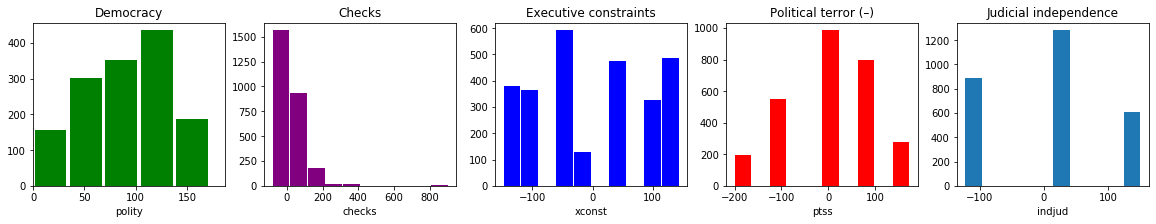

In [7]:
plt.figure(figsize=(20, 3))

plt.subplot(151)
plt.hist(df['polity'], color='green', rwidth=.90)
plt.title('Democracy')
plt.xlabel('polity')
plt.xlim(xmin=0)

plt.subplot(152)

plt.hist(df['checks'], color='purple', rwidth=.95)
plt.title('Checks')
plt.xlabel('checks')

plt.subplot(153)
plt.hist(df['xconst'], color='blue', rwidth=.95)
plt.title('Executive constraints')
plt.xlabel('xconst')

plt.subplot(154)
plt.hist(df['ptss'], color='red', rwidth=.95)
plt.title('Political terror (–)')
plt.xlabel('ptss')

plt.subplot(155)
plt.hist(df['indjud'], rwidth=.95)
plt.title('Judicial independence')
plt.xlabel('indjud')

plt.show()

- As we see those variables have an exceptionally large distribution from negative to positive and it will be hard to interpret its relationship with the success of the financial aids.
Later we will convert those indices to a more acceptable scale

# Part 2:
-------------
The main explanatory variable (independent) is <code>aid</code> which is overall aid, and its three components.
We'll explore those variables
#### 2.a) we start with summarizing three types of Aid and the GDP of recipient country:

In [8]:
df[['cmt_recip_GDP','econAid_GDP','governAid_GDP','otherAid_GDP']].describe()

,cmt_recip_GDP,econAid_GDP,governAid_GDP,otherAid_GDP
count,2843.000000,2843.000000,2843.000000,2843.000000
mean,5.237108,1.370980,0.463849,3.402287
std,7.946933,2.173830,1.735124,5.959953
min,0.000000,0.000000,0.000000,0.000000
25%,0.496056,0.082193,0.005398,0.243156
50%,2.605047,0.594106,0.068150,1.444073
75%,6.896747,1.770954,0.372156,4.221335
max,122.853050,21.441109,36.373505,110.735672


- We see that average Aid received by the country as a share of their GDP is **5.24\%**
- Financial aid to support and stimulate the economy is **1.37\%**
- Government aid to support countries' governments is **0.46\%**
- Other types of Aid (usually military or humanitarian support) is **3.40\%**

In [9]:
import matplotlib.ticker as mtick

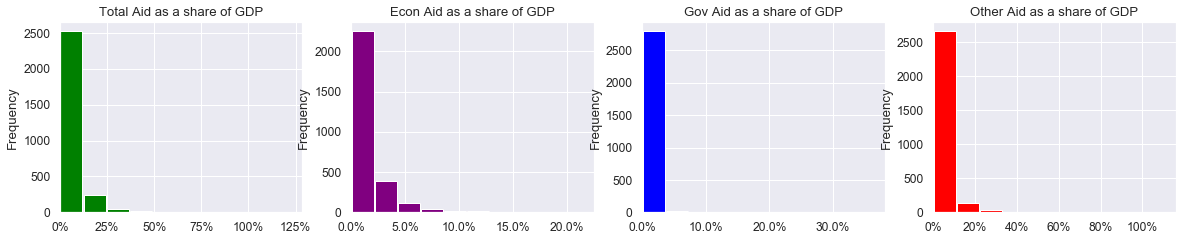

In [10]:
plt.figure(figsize=(20, 3.5))
sns.set(font_scale=1.1)

plt.subplot(141)
ax = df['cmt_recip_GDP'].plot(kind='hist', color='green', rwidth=.95)
plt.title('Total Aid as a share of GDP')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.subplot(142)
ax = df['econAid_GDP'].plot(kind='hist', color='purple', rwidth=.95)
plt.title('Econ Aid as a share of GDP')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.subplot(143)
ax = df['governAid_GDP'].plot(kind='hist', color='blue', rwidth=.95)
plt.title('Gov Aid as a share of GDP')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.subplot(144)
ax = df['otherAid_GDP'].plot(kind='hist', color='red', rwidth=.95)
plt.title('Other Aid as a share of GDP')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.show()

- Distribution of each type of aid is strongly skewed to the right and are heavily concentrated in a small range
- After examining histogram, it is apparent that the majority of countries that receive Aid are of the fairly equal in terms of aid being the share of their GDP

In [11]:
grouped_rg = df.groupby(df['recipientRegion']).mean()[['cmt_recip_GDP', 'econAid_GDP', 'governAid_GDP', 'otherAid_GDP']]
grouped_rg

,cmt_recip_GDP,econAid_GDP,governAid_GDP,otherAid_GDP
recipientRegion,,,,
East Asia & Pacific,4.596575,1.520697,0.964490,2.111387
Europe & Central Asia,2.002812,0.576212,0.268140,1.158460
Latin America & Caribbean,2.398856,0.539653,0.224128,1.635075
Middle East & North Africa,2.628124,0.640328,0.154621,1.833176
South Asia,3.678910,1.801623,0.181697,1.695591
Sub-Saharan Africa,8.572269,2.066255,0.596686,5.909328


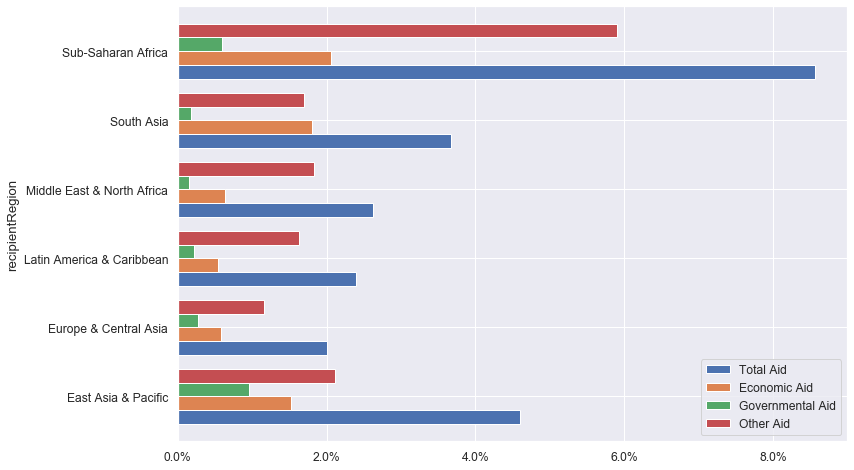

In [12]:
ax = grouped_rg.plot(kind='barh', width=.80 , figsize=(12, 8))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
aid = ['Total Aid', 'Economic Aid', 'Governmental Aid', 'Other Aid']
plt.legend(aid, loc=4)
plt.style.use('seaborn-whitegrid')

- When breaking down Aids received by the region, we see that <code>Sub-Saharan Africa</code> received the biggest share - compared to their GDP – and least funds went to <code>Latin America & Caribbean</code>
- It’s worth mentioning that <code>South Asia</code>'s majority of Aid came for the economic support
- While <code>East Asia & Pacific</code>'s accrued the most governmental aid in comparison with other regions

# Part 3:
--------------
### Now let's test the theory
First, generate a new variable, <code>'inst'</code> that is the average of the five institutional variables. Draw the histogram of your variable

In [13]:
df['inst_mean'] = ((df['polity'] + df['xconst'] + df['ptss'] + df['indjud'] + df['checks']) / 5)
df['inst_mean'].head()

0    -93.438004
1   -106.349243
2     31.778065
3    -78.425232
4    -81.296829
Name: inst_mean, dtype: float32

### 3.a) We run first regressions with an average of institutional indices on aid and its components
First, we regress average score of indices on every type of financial aid individually and analyze the findings

In [14]:
import statsmodels.formula.api as smf
reg1 = smf.ols('inst_mean ~ cmt_recip_GDP', data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inst_mean   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.456
Date:                Fri, 20 Dec 2019   Prob (F-statistic):            0.00637
Time:                        10:29:11   Log-Likelihood:                -14881.
No. Observations:                2619   AIC:                         2.977e+04
Df Residuals:                    2617   BIC:                         2.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0137      1.661      1.814      0.070      -0.244       6.272
cmt_recip_GDP    -0.4903      0.180     -2.731      0.006      -0.842      -0.138
==============================================================================
Omnibus:                      217.842   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.658
Skew:                           0.223   Prob(JB):                     9.23e-20
Kurtosis:                       2.223   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
reg2 = smf.ols('inst_mean ~ governAid_GDP', data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inst_mean   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     12.85
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           0.000343
Time:                        10:29:11   Log-Likelihood:                -14878.
No. Observations:                2619   AIC:                         2.976e+04
Df Residuals:                    2617   BIC:                         2.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7533      1.431     -0.526      0.599      -3.560       2.054
governAid_GDP     2.8724      0.801      3.585      0.000       1.301       4.443
==============================================================================
Omnibus:                      230.526   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.131
Skew:                           0.230   Prob(JB):                     1.63e-20
Kurtosis:                       2.211   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
reg3 = smf.ols('inst_mean ~ econAid_GDP', data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inst_mean   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     14.18
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           0.000170
Time:                        10:29:11   Log-Likelihood:                -14877.
No. Observations:                2619   AIC:                         2.976e+04
Df Residuals:                    2617   BIC:                         2.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.8508      1.644      2.342      0.019       0.626       7.075
econAid_GDP    -2.4804      0.659     -3.765      0.000      -3.772      -1.189
==============================================================================
Omnibus:                      206.672   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.526
Skew:                           0.216   Prob(JB):                     4.42e-19
Kurtosis:                       2.234   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
reg4 = smf.ols('inst_mean ~ otherAid_GDP', data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inst_mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.56
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           0.000683
Time:                        10:29:11   Log-Likelihood:                -14878.
No. Observations:                2619   AIC:                         2.976e+04
Df Residuals:                    2617   BIC:                         2.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.2461      1.602      2.026      0.043       0.105       6.387
otherAid_GDP    -0.8263      0.243     -3.400      0.001      -1.303      -0.350
==============================================================================
Omnibus:                      234.080   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.354
Skew:                           0.216   Prob(JB):                     3.95e-20
Kurtosis:                       2.204   Cond. No.                         7.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_Summary:_
We have an interesting finding displayed here. It shows that governmental financial aid is the only type of aid which helps to improve institutions in the recipient country. Its _P-value_ is close to zero which speaks of its statistical significance.
However, other types of financial aid (the economic aid, the other aid, and the total aid) have a negative effect on the institutions. All of those variables have a _P-value_ close to zero which means they also are statistically significant.
There’ve have been many critics of financial aid, which has not resulted in the improvement of institutional qualities in receiving countries. Usually, those funds are never put to expected employment and are consumed by the bank accounts of the small number of people.
Of course, we cannot explain (and I never intended) the effect of the financial aid by one variable as there are other variables that we have not controlled for, but it gives some idea if those aids are working towards a positive direction or towards a negative direction.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

(0.0, 140)

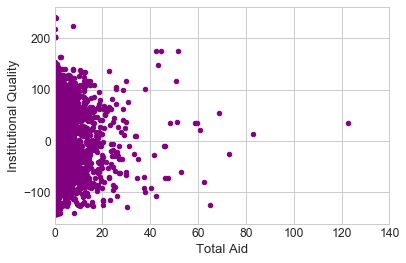

In [19]:
figsize=(15,5)
plt.style.use('seaborn-whitegrid')
df.plot(kind='scatter', x='cmt_recip_GDP', y='inst_mean', color='purple')
plt.xlabel('Total Aid')
plt.ylabel('Institutional Quality')
plt.axis('tight')
plt.xlim(xmin=0)
plt.xlim(xmax=140)

* The scatter graph shows that overall Total Financial Aid is close to being equally distributed with good and bad institutional quality, but it's still leaning towards the negative side of the institutional quality score


#### 3.a) Next we'll run the regression with all three types of Aid:

In [20]:
reg4 = smf.ols('inst_mean ~ governAid_GDP + econAid_GDP + otherAid_GDP', data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inst_mean   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     15.31
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           7.11e-10
Time:                        10:29:12   Log-Likelihood:                -14861.
No. Observations:                2619   AIC:                         2.973e+04
Df Residuals:                    2615   BIC:                         2.975e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4092      1.694      2.602      0.009       1.087       7.731
governAid_GDP     4.5392      0.857      5.294      0.000       2.858       6.220
econAid_GDP      -1.9184      0.739     -2.597      0.009      -3.367      -0.470
otherAid_GDP     -1.0085      0.288     -3.504      0.000      -1.573      -0.444
==============================================================================
Omnibus:                      215.725   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.847
Skew:                           0.201   Prob(JB):                     6.21e-19
Kurtosis:                       2.221   Cond. No.                         8.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Once again, all the Aid variables are statistically significant (_P-value_ ≈ 0) but the effect of the Governmental Aid has a higher positive coefficient then before, while economic and other aid remains with a negative coefficient.

# Part 4:
----------
> Institutional variables are slow-changing variables. Changes from one year to another may not be considerable. To overcome this issue, we can use the mean values of measured over time.

#### 4.a) In this part we'll calculate the mean values of variables for each country

In [21]:
df_col = df.groupby('country')['polity','ptss','indjud', 'checks', 'inst_mean', 'cmt_recip_GDP', 'governAid_GDP', 'econAid_GDP', 'otherAid_GDP'].agg(['mean'])
df_col.head()

,polity,ptss,indjud,checks,inst_mean,cmt_recip_GDP,governAid_GDP,econAid_GDP,otherAid_GDP
,mean,mean,mean,mean,mean,mean,mean,mean,mean
country,,,,,,,,,
AGO,-92.505363,-130.665817,-98.048538,-72.002342,-88.511253,3.884730,0.299521,0.679730,2.905479
ALB,4.513433,33.264633,-35.186028,-35.144299,-4.479980,3.540002,0.497637,0.885168,2.157197
ARG,117.838768,66.719826,18.773989,72.824478,73.179199,0.066264,0.002378,0.028331,0.035554
AZE,-94.313599,-23.433115,-116.255142,-64.243759,-74.473793,1.632052,0.125706,0.740080,0.766265
BDI,-64.302223,-100.556137,-79.531349,-76.140251,-77.051071,14.166568,1.647794,2.287014,10.231760


#### 4.b) Now, we'll run a regression with the mean scores of those indices and compare the results

In [22]:
reg = smf.ols('inst_mean ~ governAid_GDP + econAid_GDP + otherAid_GDP', data=df_col).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inst_mean   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3.597
Date:                Fri, 20 Dec 2019   Prob (F-statistic):             0.0162
Time:                        10:29:12   Log-Likelihood:                -567.39
No. Observations:                 104   AIC:                             1143.
Df Residuals:                     100   BIC:                             1153.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.9604      8.169      0.852      0.396      -9.247      23.168
governAid_GDP    17.1017      7.333      2.332      0.022       2.553      31.650
econAid_GDP       6.5243      6.836      0.954      0.342      -7.037      20.086
otherAid_GDP     -7.1370      2.548     -2.801      0.006     -12.192      -2.082
==============================================================================
Omnibus:                        3.032   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.015
Skew:                           0.127   Prob(JB):                        0.365
Kurtosis:                       2.367   Cond. No.                         8.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We can observe that overtime gov. Aid has a strong influence on the improvement of the institutions. Its _P-value_ is less than 2% thus variable is statistically significant with the 95% confidence interval.
* Also, now we see that the financial aid targeted at the economic development translates in positive results over time. However, _P-value_ is extremely high so I'll leave judgment to the audience if this indicator should be used to deduct any strong conclusions.
* Other aid remains a negative contributor to the development of the institutions and we'll leave it there

# Part 5:
------------
#### 5.a) We will add the income variable <code>'recipientGdp_log'</code> to the model, to control for income and explain if it's statistically significant to include and/or if it's a reasonable candidate to be in our model
we convert <code>'recipientGdp_log'</code> to float type and fill <code>NaN</code> results with the mean values of the _GDP_log_

In [23]:
df["recipientGdp_log"] = pd.to_numeric(df["recipientGdp_log"])
df["recipientGdp_log"].fillna((df["recipientGdp_log"].mean()), inplace=True)
df["recipientGdp_log"].isnull

<bound method Series.isnull of 0       7.813625
1       8.390363
2       9.100701
3       6.449562
4       7.024415
          ...   
2838    7.963833
2839    8.276392
2840    7.771903
2841    9.158718
2842    7.245142
Name: recipientGdp_log, Length: 2843, dtype: float32>

We regress our model with the log value of the income, which represents percentage change in income:

In [24]:
reg = smf.ols('inst_mean ~ governAid_GDP + econAid_GDP + otherAid_GDP + recipientGdp_log', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inst_mean   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     122.2
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           9.94e-96
Time:                        10:29:12   Log-Likelihood:                -14660.
No. Observations:                2619   AIC:                         2.933e+04
Df Residuals:                    2614   BIC:                         2.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -273.8100     13.427    -20.393      0.000    -300.138    -247.482
governAid_GDP        4.6791      0.794      5.893      0.000       3.122       6.236
econAid_GDP          2.0174      0.709      2.843      0.004       0.626       3.409
otherAid_GDP         0.8537      0.281      3.037      0.002       0.303       1.405
recipientGdp_log    34.0350      1.631     20.864      0.000      30.836      37.234
==============================================================================
Omnibus:                       26.973   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.363
Skew:                           0.157   Prob(JB):                     1.39e-05
Kurtosis:                       2.673   Cond. No.                         95.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* When we add income to the model, we see a massive reduction in standard error and all of the aids show a positive effect on the institutional quality. Income itself has strong explanatory power with a massive (34.04) coefficient.
    * This can be explained by the fact that financial aid has a strong effect on the countries with higher GDP, because in general wealthier countries already have well-established institutions.
    * Also, in general, it’s always a good idea to control for the income to eliminate the bias involved with it
* The _Adjusted-R2_ increases from .007 to 0.156 which means that the given variables fit in the model and explain it better

#### 5.b) Next, I will add some of the most interesting and statistically significant variables to the model which I picked from testing several combinations.

In [25]:
df.dtypes

year                datetime64[ns]
recipientCode                int16
country                     object
recipientRegion             object
weight                        int8
pop_weight                 float32
calpha                     float32
polity                     float32
xconst                     float32
ptss                       float32
indjud                     float32
checks                     float32
cmt_recip_GDP              float32
governAid_GDP              float32
econAid_GDP                float32
otherAid_GDP               float32
blt_GDP                    float32
recipientGdp_log           float32
recipientPop_log           float32
rc_wdi_lifexp              float64
rc_wdi_ttr                 float64
rc_wdi_urban               float64
rc_oilgas                     int8
missing                       int8
rc_ht_region                  int8
rc_ht_colonial                int8
recipientIncL                 int8
recipientIncLM                int8
recipientIncUM      

In [26]:
reg = smf.ols('inst_mean ~ governAid_GDP + econAid_GDP + otherAid_GDP + recipientGdp_log + rc_oilgas', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inst_mean   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     189.9
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          6.33e-173
Time:                        10:29:12   Log-Likelihood:                -14478.
No. Observations:                2619   AIC:                         2.897e+04
Df Residuals:                    2613   BIC:                         2.900e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -301.9990     12.612    -23.946      0.000    -326.729    -277.269
governAid_GDP        4.4326      0.741      5.981      0.000       2.979       5.886
econAid_GDP          0.6920      0.666      1.040      0.299      -0.613       1.997
otherAid_GDP         0.7896      0.262      3.010      0.003       0.275       1.304
recipientGdp_log    39.8180      1.550     25.683      0.000      36.778      42.858
rc_oilgas          -55.2162      2.802    -19.705      0.000     -60.711     -49.722
==============================================================================
Omnibus:                       20.102   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.482
Skew:                           0.216   Prob(JB):                     3.57e-05
Kurtosis:                       2.969   Cond. No.                         96.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* I ended up adding - if the country has natural resources like oil and gas - and the findings are astonishing!
* We see that countries who possess and are exporting oil and gas show massively negative effects of financial aid on institutional quality. The coefficient of an oil & gas variable is **-55** which is nearly double the income effect. It's _P-value_ is close to 0
* Addition of the oil & gas variable also made our model better fit with _adjusted R-squared_ from previously 15.6% jumping to **26.5%.** 

Many conclusions can be done based on these results. But the one thing is evidential that countries who have good institutional quality benefit from additional funds received from other countries targeted on the further improvement of those institutions. Also, government aid works best. Giving money to countries with natural resources like oil & gas has deteriorated their institutional quality.
My findings are close to what original paper suggests, even though I've not gotten into using lagged values of aid variables, which authors of the paper consider to have better explanatory power as per fact after receiving aid it takes some time until we see the results of those funds.
